In [17]:
import numpy as np
from matplotlib import pyplot as plt
RANDOM_STATE = 341


# 1. Stochastic Gradient Descent para encontrar el máximo de una función

Búsqueda del minimo de la derivada ( máximo de la función) utilizzando learning rate fijo, con precisión establecida por debajo de la cual se finaliza el entrenamiento.

Para el valor inicial X_0 = 4881.350392732478, utilizando un learning rate fijo de lr = 0.1  se logró un error= 8.063807399594225e-10 luego de 136 epochs. 
El valor máximo de la función se da para X = 2.000000000322552 

El máximo valor de la función encontrado fue Y = 3.0, para X = 2.000000000322552


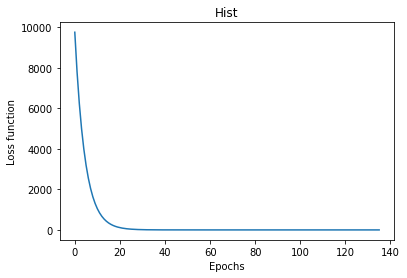

In [18]:
EPOCHS = 500
lr = 0.1
precision = 10e-10
hist =[]
np.random.seed(0)
x = np.random.uniform(-50000,50000)
x_0 = x
epoch = 0
for e in range(EPOCHS):
  dy = -2*x+4
  err = 0 - dy
  x = x - lr*err
  hist.append(err)
  epoch += 1
  if np.abs(err) < precision:
    break

print('Para el valor inicial X_0 = {}, utilizando un learning rate fijo de lr = {}  se logró un error= {} luego de {} epochs. \nEl valor máximo de la función se da para X = {} \n'.format(x_0,lr,err,epoch,x))

y = -2*np.power(x-2,2)+3

print('El máximo valor de la función encontrado fue Y = {}, para X = {}'.format(y,x))

plt.figure()
plt.title('Hist')
plt.plot(range(epoch),hist)
plt.ylabel('Loss function')
plt.xlabel('Epochs')
plt.show()

La busqueda finalizó cuando el error durante el proceso de entrenamiento estuvo debajo de la precisión predefinida. Con lo anterior, el entrenamiento duró menos tiempo logrando un resultado aceptable.

Se inicializó la variable X de manera aleatoria utilizanfo numpy entre dos valores pre-definidos (-50000 , 50000). Cuando la variable inicializa en los valores extremos , la cantidad de Epochs necesarias para alcanzar la precisión bsucada fue de 146, siendo este el peor caso, en este escenario.

Los hiper-parámetros son el learning rate, la precisión y la cantidad de epochs máxima.



# 2. Mini-Batch Gradient Descent para entrenar un modelo cuadrático

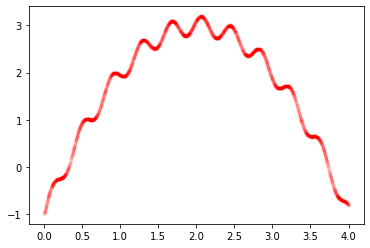

In [66]:
X = np.random.uniform(0,4,10000)
x=X
y = -(x-2)**2 + 3 + 0.2*np.sin(16*x)

plt.figure()
plt.plot(x,y,'.r',alpha=0.01)

In [135]:
EPOCHS = 500
BATCH_SIZE = 15
lr = 0.001
# np.random.seed(0)
epoch = 0


MSE = []
w1 = np.random.rand()*0
w2 = np.random.rand()*0
w3 = np.random.rand()*0

W1 = []
W2 = []
W3 = []


W1.append(w1)
W2.append(w2)
W3.append(w3)

print(w1,w2,w3)

for e in range(EPOCHS):
  # print('EPOCH: ',e)
  idx = list(range(len(X)))
  np.random.shuffle(idx)
  
  W1.append(w1)
  W2.append(w2)
  W3.append(w3)
  epoch += 1
  for i in range(int(len(X)/BATCH_SIZE)):
    dL_dy_hat_ = 0
    dy_dw1_ = 0
    dy_dw2_ = 0
    dy_dw3_ = 0
    err = 0
    x_batch = X[idx[i*BATCH_SIZE:(i+1)*BATCH_SIZE]]
    Y = []
    Y_hat = []
    for x in x_batch:
      y = -(x-2)**2 + 3 + 0.2*np.sin(16*x)
      y_hat = w1*x*x + w2*x + w3
      Y.append(y)
      Y_hat.append(y_hat)
      dL_dy_hat_ += -2*(y - y_hat)
      # print(y,y_hat)
      dy_dw1_ += x**2
      dy_dw2_ += x
      dy_dw3_ += 1
      
    err += np.mean(np.power((np.array(Y) - np.array(Y_hat)),2))
    dL_dy_hat = dL_dy_hat_/BATCH_SIZE
    dy_dw1 = dy_dw1_/BATCH_SIZE
    dy_dw2 = dy_dw2_/BATCH_SIZE
    dy_dw3 = dy_dw3_/BATCH_SIZE
    dL_dw1 = dL_dy_hat*dy_dw1
    dL_dw2 = dL_dy_hat*dy_dw2
    dL_dw3 = dL_dy_hat*dy_dw3
    w1 = w1 - lr*dL_dw1
    w2 = w2 - lr*dL_dw2
    w3 = w3 - lr*dL_dw3
    
  MSE.append(err/BATCH_SIZE)
   

print(w1,w2,w3)



0.0 0.0 0.0
-0.9265009366549474 3.6741815171548233 -0.7333398283217638


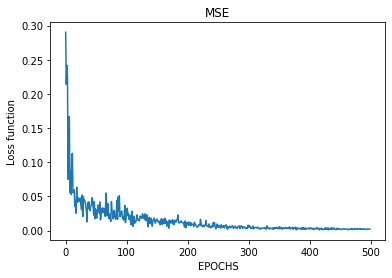

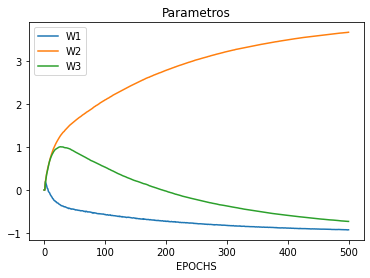

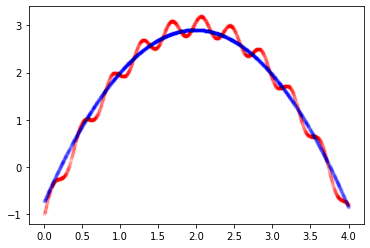

In [136]:
plt.figure()
plt.title('MSE')
plt.plot(range(EPOCHS),MSE)
plt.ylabel('Loss function')
plt.xlabel('EPOCHS')
plt.show()

plt.figure()
plt.title('Parametros')
plt.plot(W1)
plt.plot(W2)
plt.plot(W3)
plt.legend(['W1','W2','W3'])
plt.xlabel('EPOCHS')
plt.show()

Y = -(X-2)**2 + 3 + 0.2*np.sin(16*X)
Y_hat = w1*X**2 + w2*X + w3
plt.figure()
plt.plot(X,Y,'.r',alpha=0.01)
plt.plot(X,Y_hat,'.b',alpha=0.01)



Text(1.5, -0.5, 'MSE = 0.002206')

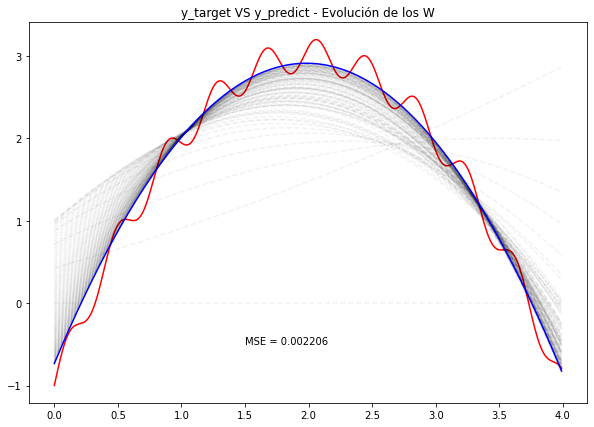

In [137]:
X_test = np.arange(0,4,0.01)


plt.figure(figsize = (10,7))
Y = -(X_test-2)**2 + 3 + 0.2*np.sin(16*X_test)
plt.plot(X_test,Y,'r',alpha=1)
for i in range(0,len(W1),int(len(W1)/100)):
  Y_hat = W1[i]*X_test**2 + W2[i]*X_test + W3[i]
  plt.plot(X_test,Y_hat,'--k',alpha=0.05)
Y_hat = w1*X_test**2 + w2*X_test + w3
plt.plot(X_test,Y_hat,'b',alpha=1)
plt.title('y_target VS y_predict - Evolución de los W')
s = 'MSE = {:.6f}'.format(MSE[-1])
plt.text(1.5,-0.5,s)